# Logistic Regression Consulting Project



## Binary Customer Churn

A marketing agency has many customers that use their service to produce ads for the client/customer websites. They've noticed that they have quite a bit of churn in clients. They basically randomly assign account managers right now, but want you to create a machine learning model that will help predict which customers will churn (stop buying their service) so that they can correctly assign the customers most at risk to churn an account manager. Luckily they have some historical data, can you help them out? Create a classification algorithm that will help classify whether or not a customer churned. Then the company can test this against incoming data for future customers to predict which customers will churn and assign them an account manager.

Logistic regression is a statistical method for predicting binary classes. The outcome or target variable is dichotomous in nature. Dichotomous means there are only two possible classes.

The data is saved as customer_churn.csv. Here are the fields and their definitions:

   
    Name : Name of the latest contact at Company
    Age: Customer Age
    Total_Purchase: Total Ads Purchased
    Account_Manager: Binary 0=No manager, 1= Account manager assigned
    Years: Totaly Years as a customer
    Num_sites: Number of websites that use the service.
    Onboard_date: Date that the name of the latest contact was onboarded
    Location: Client HQ Address
    Company: Name of Client Company
    
 The client wants to know which customers are most likely to churn given this data (they don't have the label yet).
 
 In the context of customer churn, "churn" refers to the phenomenon where customers or clients stop using a company's products or services. It essentially means that customers have decided to discontinue their business relationship with the company, often by canceling subscriptions, discontinuing services, or no longer making purchases. Churn is a critical metric for businesses because it can significantly impact revenue and profitability. Identifying and predicting customer churn is essential for companies to take proactive steps to retain customers and maintain a stable customer base.

In the dataset you provided, which is used for predicting customer churn, the "Account_Manager" field is a binary variable with values 0 and 1. In this context:

- 0: This typically represents that no account manager has been assigned to the customer. This means the customer does not have a dedicated account manager responsible for managing their account and ensuring their satisfaction.

- 1: This typically represents that an account manager has been assigned to the customer. In this case, the customer does have a dedicated account manager responsible for managing their account and ensuring their satisfaction.

The goal of creating a classification algorithm for customer churn is to predict whether a customer is likely to churn (stop using the company's services) based on various customer-related features such as age, total purchase history, years as a customer, number of websites using the service, and other relevant factors. The "Account_Manager" field can be one of the features used to make this prediction, as it may have an impact on customer retention.

By using historical data and machine learning techniques, the company can build a model that helps them identify which customers are most likely to churn in the future. This allows them to take proactive steps, such as assigning dedicated account managers to at-risk customers, offering special promotions, or providing better customer support, to reduce churn and retain valuable customers.

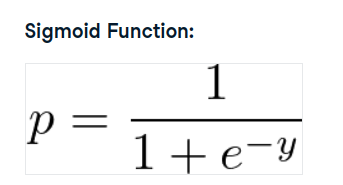

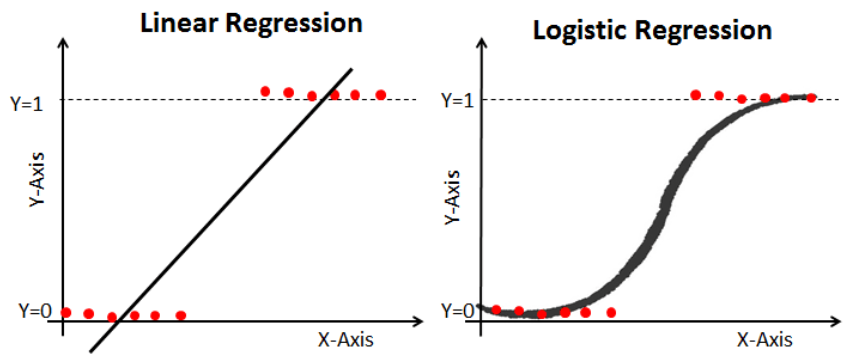

In [13]:
from pyspark.sql import SparkSession

In [14]:
spark = SparkSession.builder.appName('logregconsult').getOrCreate()

In [15]:
data = spark.read.csv('customer_churn.csv',inferSchema=True,
                     header=True)

In [16]:
data.printSchema()

root
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Onboard_date: timestamp (nullable = true)
 |-- Location: string (nullable = true)
 |-- Company: string (nullable = true)
 |-- Churn: integer (nullable = true)



### Check out the data

In [17]:
data.describe().show()

+-------+-------------+-----------------+-----------------+------------------+-----------------+------------------+--------------------+--------------------+-------------------+
|summary|        Names|              Age|   Total_Purchase|   Account_Manager|            Years|         Num_Sites|            Location|             Company|              Churn|
+-------+-------------+-----------------+-----------------+------------------+-----------------+------------------+--------------------+--------------------+-------------------+
|  count|          900|              900|              900|               900|              900|               900|                 900|                 900|                900|
|   mean|         NULL|41.81666666666667|10062.82403333334|0.4811111111111111| 5.27315555555555| 8.587777777777777|                NULL|                NULL|0.16666666666666666|
| stddev|         NULL|6.127560416916251|2408.644531858096|0.4999208935073339|1.274449013194616|1.764835592035

In [18]:
data.columns

['Names',
 'Age',
 'Total_Purchase',
 'Account_Manager',
 'Years',
 'Num_Sites',
 'Onboard_date',
 'Location',
 'Company',
 'Churn']

In [19]:
import pandas as pd
import numpy as np
import plotly.express as px

In [20]:
data.show()

+-------------------+----+--------------+---------------+-----+---------+-------------------+--------------------+--------------------+-----+
|              Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|       Onboard_date|            Location|             Company|Churn|
+-------------------+----+--------------+---------------+-----+---------+-------------------+--------------------+--------------------+-----+
|   Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|2013-08-30 07:00:40|10265 Elizabeth M...|          Harvey LLC|    1|
|      Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|2013-08-13 00:38:46|6157 Frank Garden...|          Wilson PLC|    1|
|        Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|2016-06-29 06:20:07|1331 Keith Court ...|Miller, Johnson a...|    1|
|      Phillip White|42.0|       8010.76|              0| 6.71|     10.0|2014-04-22 12:43:12|13120 Daniel Moun...|           Smith Inc|    1|
|     

In [21]:
df = pd.read_csv("customer_churn_dataset-testing-master.csv")

# Correlation between age type and payment delay:
df['Age Type'] = pd.cut(df['Age'], bins=[0,30,60,100], labels=['Young', 'Adult', 'Senior'])
age_payment_corr = df.groupby('Age Type')['Payment Delay'].mean().reset_index()
fig = px.bar(age_payment_corr, x='Age Type', y='Payment Delay', title='Correlation between Age Type and Payment Delay', color='Age Type')

fig.update_traces(marker=dict(color='blue'))  # Change the bar color to blue

fig.add_annotation(dict(font=dict(color='orange', size=13),
                       x=0,
                       y=-0.11,
                       showarrow=False,
                       textangle=0,
                       xanchor='left',
                       xref="paper",
                       yref="paper"))

fig.show()

In [22]:
import plotly.graph_objects as go

trace = go.Waterfall(
    x=age_payment_corr['Age Type'],
    y=age_payment_corr['Payment Delay'],
    measure=['relative', 'relative', 'total'],
    text=['Relative', 'Relative', 'Total'],
    connector={'line': {'color': 'orange'}}
)

layout = go.Layout(
    title='Correlation between Age Type and Payment Delay',
    xaxis=dict(title='Age Type'),
    yaxis=dict(title='Payment Delay')
)

fig = go.Figure(data=[trace], layout=layout)

fig.add_annotation(dict(font=dict(color='orange', size=13),
                       x=0,
                       y=-0.11,
                       showarrow=False,
                       textangle=0,
                       xanchor='left',
                       xref="paper",
                       yref="paper"))

fig.show()

# A waterfall chart
# measure: Defines the type of values. In this case, 
# it's set to "relative" for the first two items and "total" for the last item, which represents the total.
# text: Labels for each category (optional).

# In a waterfall chart, the "measure" parameter specifies how each data point is treated concerning 
# the previous data points.
# The first two items in the waterfall chart are set to "relative" to show how the "Payment Delay" values change 
# concerning the "Age Type" categories. 
# This helps visualize how each "Age Type" category contributes to the total "Payment Delay." 
# The last item is set to "total" to show the cumulative "Payment Delay."

# Using "relative" and "total" in this manner allows you to understand how each category contributes to the 
# overall total, which can be especially useful for analyzing data with a hierarchical or incremental structure.
# A waterfall chart

In [23]:

df['Subscription Type'] = df['Subscription Type'].astype('category').cat.codes

# converts the "Subscription Type" column in your DataFrame df to a categorical type and then assigns
# unique numeric codes to each category. This is done to prepare the data for correlation calculation

correlation = df[['Subscription Type', 'Usage Frequency']].corr()

# it calculates the correlation between the "Subscription Type" and "Usage Frequency"

fig = px.imshow(correlation, title='Correlation between Subscription Type and Usage Frequency')

# it use Plotly Express to create an image (heatmap) of the correlation matrix. 
# The correlation DataFrame is used as input data for the heatmap, and the title is 
# set as "Correlation between Subscription Type and Usage Frequency."

fig.add_annotation(dict(font=dict(color='orange',size=13),
                                    x=0,
                                    y=-0.11,
                                    showarrow=False,
                                    textangle=0,
                                    xanchor='left',
                                    xref="paper",
                                    yref="paper"))

# The annotation is placed at a specific position defined by x and y coordinates, 
# and it is not accompanied by an arrow

fig.show()


# heatmap plot using Plotly Express (px.imshow)
# heatmap is a graphical representation of data where individual values are represented as colors. 


In [24]:
data.printSchema()

# Convert string to integer (Not needed here )

root
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Onboard_date: timestamp (nullable = true)
 |-- Location: string (nullable = true)
 |-- Company: string (nullable = true)
 |-- Churn: integer (nullable = true)



In [25]:
data.columns

['Names',
 'Age',
 'Total_Purchase',
 'Account_Manager',
 'Years',
 'Num_Sites',
 'Onboard_date',
 'Location',
 'Company',
 'Churn']

In [26]:
# Removing NULL Values Columns
rm_columns = data.select(['Names',
 'Age',
 'Total_Purchase',
 'Account_Manager',
 'Years',
 'Num_Sites',
 'Onboard_date',
 'Location',
 'Company',
 'Churn']) 
  
# Drops the data having null values 
result = rm_columns.na.drop() 
  
# Again showing the data 
result.show()


+-------------------+----+--------------+---------------+-----+---------+-------------------+--------------------+--------------------+-----+
|              Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|       Onboard_date|            Location|             Company|Churn|
+-------------------+----+--------------+---------------+-----+---------+-------------------+--------------------+--------------------+-----+
|   Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|2013-08-30 07:00:40|10265 Elizabeth M...|          Harvey LLC|    1|
|      Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|2013-08-13 00:38:46|6157 Frank Garden...|          Wilson PLC|    1|
|        Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|2016-06-29 06:20:07|1331 Keith Court ...|Miller, Johnson a...|    1|
|      Phillip White|42.0|       8010.76|              0| 6.71|     10.0|2014-04-22 12:43:12|13120 Daniel Moun...|           Smith Inc|    1|
|     


We'll ues the numerical columns. We'll include Account Manager because its easy enough, but keep in mind it probably won't be any sort of a signal because the agency mentioned its randomly assigned!

Before building the model, we need to assemble the input features into a single feature vector using the VectorAssembler class. Then, we will split the dataset into a training set (70%) and a testing set (30%).

In [27]:
from pyspark.ml.feature import VectorAssembler

#VectorAssembler is used to assemble multiple columns into a single vector column.

# The columns in our dataset
# ['Names','Age','Total_Purchase','Account_Manager','Years','Num_Sites','Onboard_date','Location','Company','Churn']

In [28]:
assembler = VectorAssembler(inputCols=['Age',
 'Total_Purchase',
 'Account_Manager',
 'Years',
 'Num_Sites'],outputCol='features')

# inputCols specifies the list of columns from your dataset that you want to assemble into a single vector. 
# It includes 'Age', 'Total_Purchase', 'Account_Manager', 'Years', and 'Num_Sites'.

# outputCol specifies the name of the output vector column that will contain assembled features named as'features'.

In [29]:
output = assembler.transform(data)

# Using the transform method of the VectorAssembler, you apply the assembly process to your dataset (data).
# This step creates a new column 'features' that contains a vector with the specified input columns.

In [30]:
final_data = output.select('features','churn')

# You select the 'features' column and the 'churn' column from the transformed data.
# The 'features' column contains the assembled vector of input features, and the 'churn' column typically 
# represents the target variable or label for a machine learning model.

# After executing this code, final_data will contain the input features in vectorized form in the 
# 'features' column and the 'churn' column, which likely represents whether a customer has churned
# or not (the target variable). This data can be used for training machine learning models in PySpark.

### Test Train Split

In [31]:
train_churn,test_churn = final_data.randomSplit([0.7,0.3])

### Fit the model

In [32]:
from pyspark.ml.classification import LogisticRegression

In [33]:
lr_churn = LogisticRegression(labelCol='churn')

# Building the Logistic Regression model
# logistic_regression = LogisticRegression(featuresCol="features", labelCol="label")
# model = logistic_regression.fit(train_data)

In [34]:
fitted_churn_model = lr_churn.fit(train_churn)

In [35]:
training_sum = fitted_churn_model.summary

In [36]:
training_sum.predictions.describe().show()


# retrieves the predictions made by the logistic regression model on the training dataset. 
# These predictions are typically probabilities of a certain event (e.g., the probability of 
# churn for each data point in the training set).

+-------+------------------+-------------------+
|summary|             churn|         prediction|
+-------+------------------+-------------------+
|  count|               633|                633|
|   mean|0.1674565560821485|0.12954186413902052|
| stddev|0.3736782720962711|0.33606426247610455|
|    min|               0.0|                0.0|
|    max|               1.0|                1.0|
+-------+------------------+-------------------+



In [37]:
# optional
# Inspect the model coefficients and intercept
# These values represent the weights assigned to each feature and the bias term, respectively.

# Get the feature names and their corresponding coefficients
feature_names = output.columns
coefficients = fitted_churn_model.coefficients

# Combine feature names and coefficients into a dictionary for better readability
feature_coefficients = dict(zip(feature_names, coefficients))

# Get the model intercept
intercept = fitted_churn_model.intercept

print("Feature Coefficients:")
for feature, coefficient in feature_coefficients.items():
    print(f"{feature}: {coefficient}")

print("Intercept: {:.3f}".format(intercept))


Feature Coefficients:
Names: 0.08204674709549876
Age: 3.532202917654394e-05
Total_Purchase: 0.3947427243412194
Account_Manager: 0.7124782115074917
Years: 1.1948791150770046
Intercept: -20.931


In [38]:
# Assuming you have already trained a machine learning model and have a DataFrame 'test_data'

# Now that we have trained the model, we can evaluate its performance on the test data. 
# We will use the Area Under the ROC Curve (AUC-ROC) as our primary evaluation metric, 
# and we will also calculate the accuracy, precision, and recall to better understand the model’s performance:

# Import necessary libraries
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# Use the trained model to make predictions on the test_data
predictions = fitted_churn_model.transform(test_churn)

# Initialize the BinaryClassificationEvaluator for AUC-ROC
binary_evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="churn")
auc = binary_evaluator.evaluate(predictions)

# Initialize the MulticlassClassificationEvaluator for accuracy, precision, and recall
multi_evaluator = MulticlassClassificationEvaluator(labelCol="churn", predictionCol="prediction")
accuracy = multi_evaluator.evaluate(predictions, {multi_evaluator.metricName: "accuracy"})
precision = multi_evaluator.evaluate(predictions, {multi_evaluator.metricName: "weightedPrecision"})
recall = multi_evaluator.evaluate(predictions, {multi_evaluator.metricName: "weightedRecall"})

# Print the evaluation metrics
print(f"AUC-ROC: {auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


AUC-ROC: 0.8995
Accuracy: 0.8839
Precision: 0.8743
Recall: 0.8839


In [39]:
# Interpretation of results
# The model’s performance can be assessed using various evaluation metrics, such as AUC-ROC, accuracy, precision,
# and recall. 
# A high AUC-ROC value (close to 1) indicates that the model can effectively distinguish between the 
# two classes (classify whether or not a customer churned).

# The accuracy, precision, and recall give us additional information on the model’s performance by quantifying 
# how well it correctly classifies the samples and how often it makes false-positive or false-negative predictions.

In [40]:
# The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. 
# It is a probability curve that plots the TPR against FPR at various threshold values and essentially 
# separates the ‘signal’ from the ‘noise.’ In other words, it shows the performance of a classification model 
# at all classification thresholds. The Area Under the Curve (AUC) is the measure of the ability of a binary 
# classifier to distinguish between classes and is used as a summary of the ROC curve.

# The higher the AUC, the better the model’s performance at distinguishing between the positive & negative classes.

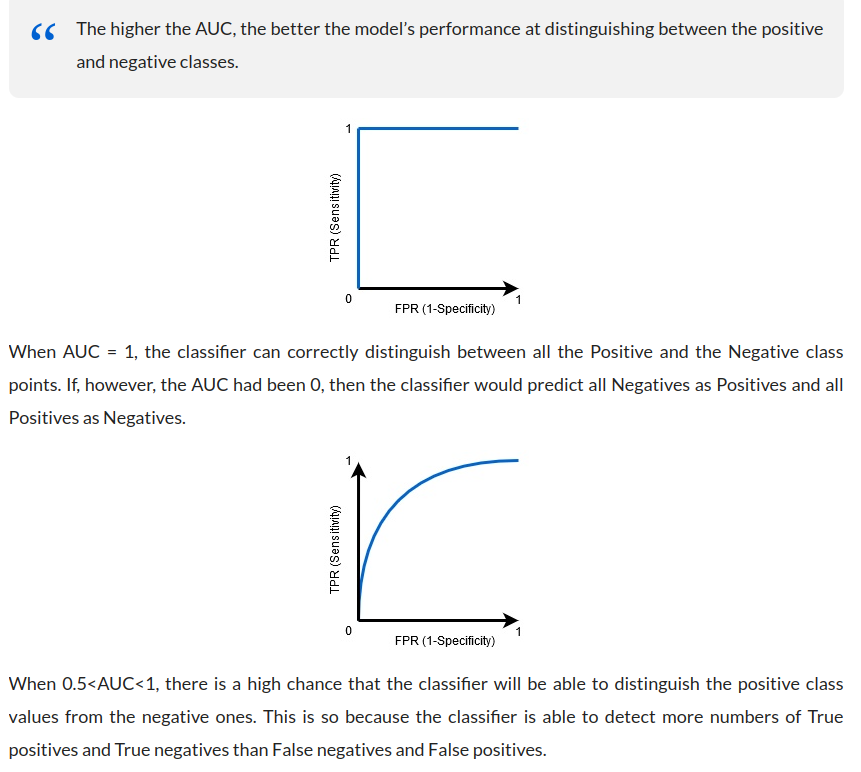

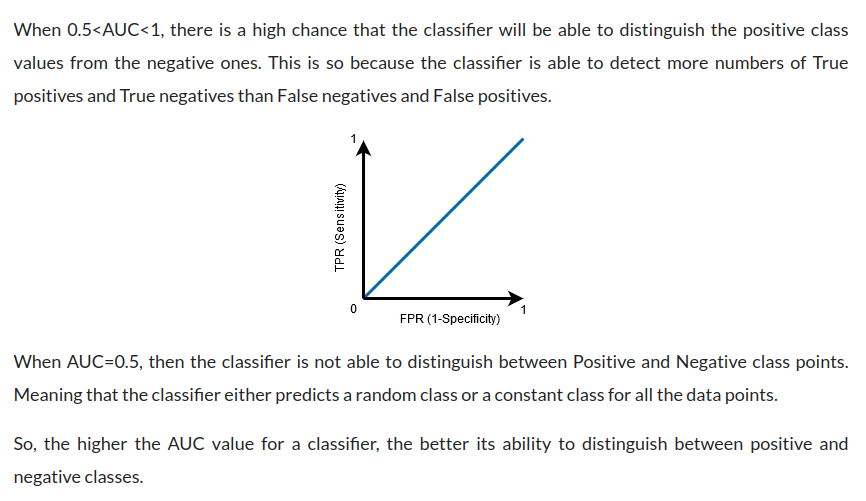

### Evaluate results

Let's evaluate the results on the data set we were given (using the test data)

In [41]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [42]:
pred_and_labels = fitted_churn_model.evaluate(test_churn)

In [43]:
pred_and_labels.predictions.show()

+--------------------+-----+--------------------+--------------------+----------+
|            features|churn|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|[26.0,8787.39,1.0...|    1|[1.08733259985093...|[0.74787910006098...|       0.0|
|[29.0,8688.17,1.0...|    1|[3.03496134123124...|[0.95412880602104...|       0.0|
|[30.0,10183.98,1....|    0|[3.29906734811737...|[0.96439680142149...|       0.0|
|[30.0,10744.14,1....|    1|[1.84007537300870...|[0.86295762141344...|       0.0|
|[30.0,11575.37,1....|    1|[4.38780148809782...|[0.98772453736179...|       0.0|
|[31.0,5304.6,0.0,...|    0|[3.67724119636041...|[0.97533128127587...|       0.0|
|[31.0,11297.57,1....|    1|[1.20620597693099...|[0.76962695203814...|       0.0|
|[31.0,12264.68,1....|    0|[3.81117129347569...|[0.97835654973714...|       0.0|
|[32.0,6367.22,1.0...|    0|[3.71361033339646...|[0.97619136559285...|       0.0|
|[32.0,8617.98,1

In [44]:
# Logistic regression using sklearn

import pandas as pd
df = pd.read_csv("customer_churn_dataset-testing-master.csv")
df.head(5)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [45]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [46]:
#split dataset in features and target variable
feature_cols = ['Age',  'Tenure', 'Usage Frequency','Support Calls','Payment Delay',
                'Total Spend','Last Interaction']
X = df[feature_cols] # Features
y = df.Churn # Target variable

In [47]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

# the Dataset is broken into two parts in a ratio of 75:25. 
# It means 75% data will be used for model training and 25% for model testing.

In [48]:
# Model Development and prediction

# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print(y_pred)

[1 0 1 ... 0 1 0]


/home/saakshi/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [49]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[6765, 1607],
       [1379, 6343]])

In [50]:
# Extract values from the confusion matrix
TP = cnf_matrix[1, 1]  # True Positives
TN = cnf_matrix[0, 0]  # True Negatives
FP = cnf_matrix[0, 1]  # False Positives
FN = cnf_matrix[1, 0]  # False Negatives

# Calculate accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)
print("Accuracy:", accuracy)

Accuracy: 0.8144650180191376


Text(0.5, 257.44, 'Predicted label')

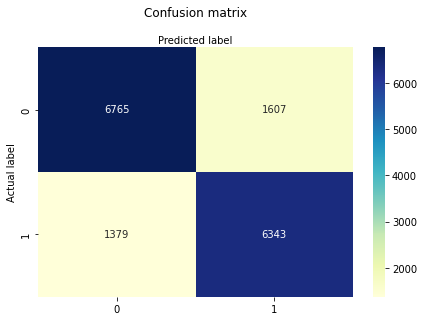

In [51]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names = [0, 1]  # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


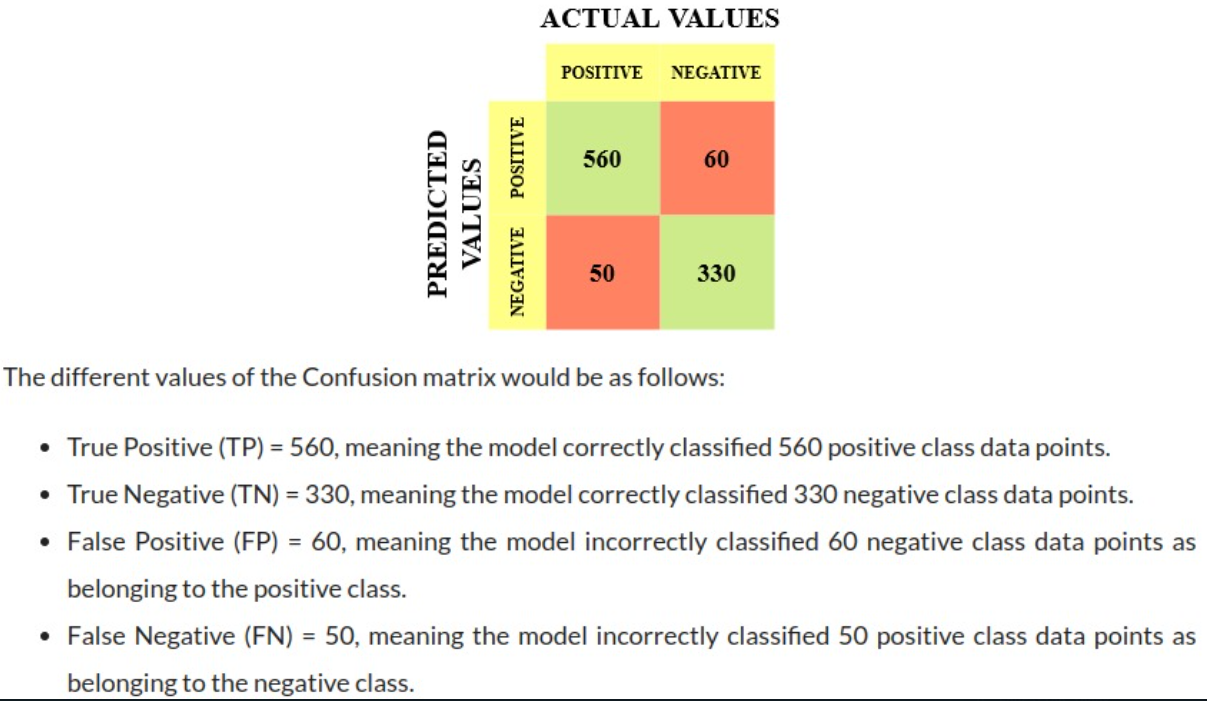